In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('agg')
from matplotlib.figure import Figure


In [6]:
%matplotlib inline

In [7]:
csv_file = 'https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv'
data = pd.read_csv(csv_file, parse_dates=['date'], index_col='date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


In [9]:
def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

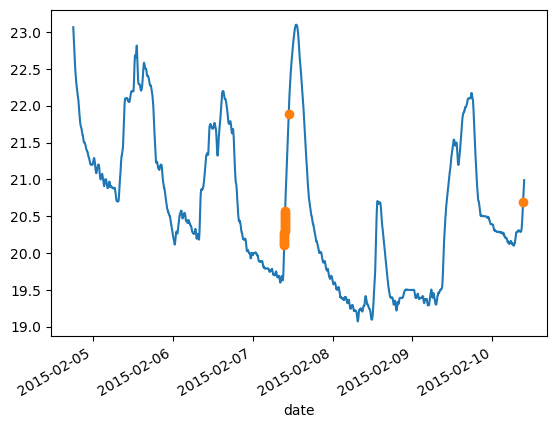

In [10]:
find_outliers(variable='Temperature', window=20, sigma=10)

In [11]:
import panel as pn
pn.extension()

window = pn.widgets.IntSlider(name='window', value=30, start=1, end=60)
sigma = pn.widgets.IntSlider(name='sigma', value=10, start=0, end=20)

interactive = pn.bind(find_outliers, window=window, sigma=sigma)

Column
    [0] IntSlider(end=60, name='window', start=1, value=30)
    [1] IntSlider(end=20, name='sigma', value=10)
    [2] ParamFunction(function, _pane=Matplotlib)
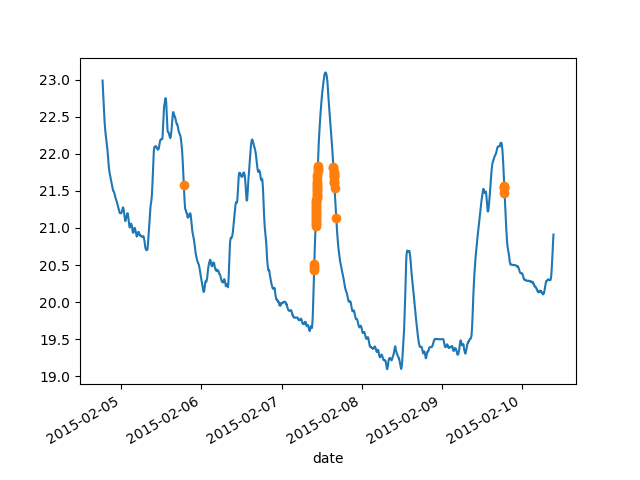

In [12]:
first_app = pn.Column(window, sigma, interactive)

first_app

In [15]:
#first_app.show()
first_app.servable();